<table>
  <tr>
      <td><div style="white-space: pre-wrap;" align="left"><font size="30" >Tutorial B2&#10;Kalman Filter 1D </font></div></td>
     <td><img src="image/RVSS-logo.png" width="400"></td>
  </tr>
</table>

# Generate true data and measurements

In [1]:
%matplotlib notebook
#We can use scipy library to generate Gaussian probability density function
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import time

#This is how many steps we will take
N = 20

#First lets generate the true state and measurements so we can evaluate the performance of our filter
#Recall x(t+1) = a*x(t) + u(t)
a = 1
#Our control will move us 50 steps every time
u = 50
#Here is our measurement constant
C = 1

#This is our true noise
true_move_noise = 2
true_mes_noise = 10

#Our true state
true_state = np.zeros((N,1))
#Our measurements
measurements = np.zeros((N,1))
#We will save our predicted state here
pred_state = np.zeros((N,1)) 
#We will save our estimated state here
est_state = np.zeros((N,1))
for i in range(1,N):
    true_state[i] = true_state[i-1]+u+np.random.randn(1,1)*true_move_noise
    measurements[i] = true_state[i]+np.random.randn(1,1)*true_mes_noise

# Set up and run Kalman Filter

<IPython.core.display.Javascript object>


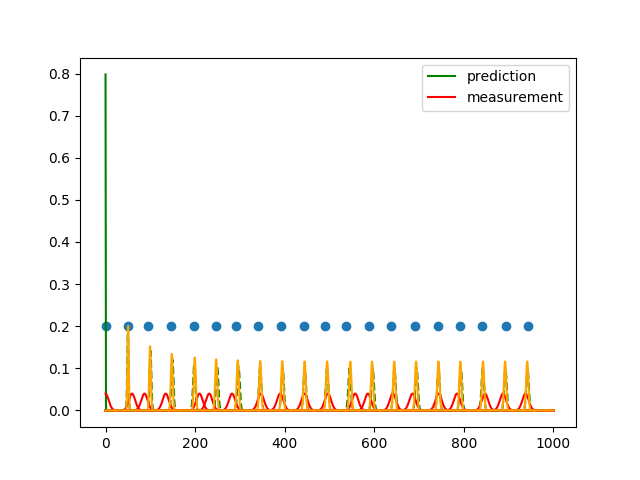

In [2]:
#----------------------------------PARAMETERS--------------------------------------
#This is our mean at t, we initialize at zero
mu_t = 0
#This is our covariance at t, we initialize very small implying we know x0 very well
sigma_t = 0.5
#This is the uncertainty in our move function 
sigma_Q = 2
#This is what we think our measurement noise is
sigma_R = 10
#-----------------------------------------------------------------------------------

#Now lets use the continuous formula
def gauss(x,mu,sigma):
    sigma = sigma + 1e-8 #This is just so we dont divide by zero
    y = np.exp(-1/2*(np.power((x-mu)/sigma,2)))/(sigma*np.sqrt(2*np.pi))
    return y

x = np.linspace(0,1000,2000)
y = gauss(np.array(x),mu_t,sigma_t)
fig = plt.figure()
plt.plot(x,y,color='green')
#Plot the measurement distribution
y = gauss(np.array(x),true_state[0],sigma_R)
plt.plot(x,y,color='red')
plt.legend(('prediction','measurement'))
# Now move and plot.
for i in range(N-1):
    
    #-----------------Here is our prediction step-------------------#
    #-
    mu_bar = a*mu_t + u
    sigma_bar = np.sqrt(a*a*sigma_t*sigma_t + sigma_Q*sigma_Q)
    #-
    #---------------------------------------------------------------#
    
    #---------------Here is our update step--------------------------#
    #-
    z = measurements[i+1]
    K = C*sigma_bar*sigma_bar/(C*C*sigma_bar*sigma_bar + sigma_R*sigma_R)
    mu_t = mu_bar + K*(z-C*mu_bar)
    sigma_t = (1-K*C)*sigma_bar
    #-
    #----------------------------------------------------------------#
    
    y = gauss(np.array(x),mu_bar,sigma_bar)
    plt.plot(x,y,color='green', linestyle='dashed')
    
    #Here we measure, note we plot the measurement centered around the true measured value
    y = gauss(np.array(x),measurements[i+1],sigma_R)
    plt.plot(x,y,color='red')
    
    #Finally plot the combined distribution
    y = gauss(np.array(x),mu_t,sigma_t)
    plt.plot(x,y,color='orange')
    
    #Save our estimate
    pred_state[i+1] = mu_bar
    est_state[i+1] = mu_t
    
    #Pause and refresh figure
    time.sleep(0.2)
    fig.canvas.draw()

#Finally plot ground truth positions 
plt.scatter(true_state,0.2*np.ones((N,1)))

<IPython.core.display.Javascript object>


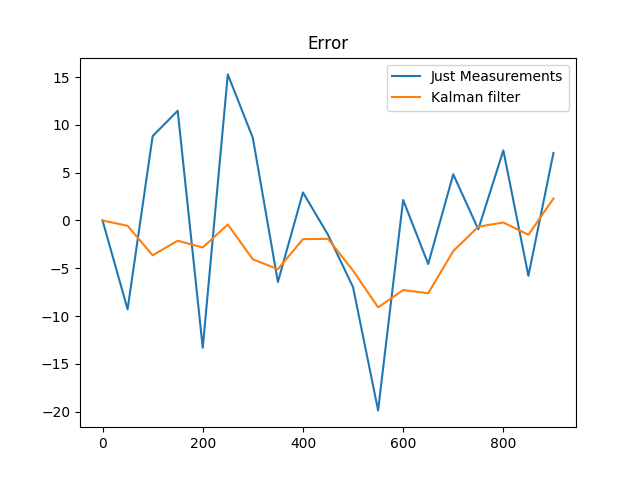

Text(0.5,1,'Error')

In [3]:
#Here we plot the difference between our true state and the measurement 
#and the true state and our estimated state to show that our estimation is better than
#relying just on measurement
plt.figure()
plt.plot(np.arange(N-1)*u,true_state[:-1]-measurements[:-1])
plt.plot(np.arange(N-1)*u,true_state[:-1]-est_state[:-1])
plt.legend(('Just Measurements','Kalman filter'))
plt.title('Error')